# Assignment 2
Xiaoqi Shi, s2059352, Group 19 Edinburgh Festivals

## Data Description

Our data are all from the API provided by Data Host, which contains very rich data. We use data of the 2017 to 2019 Edinburgh Festival Fringe for our data analysis. Due to ethics issues and the need to obtain permission to access the API, the detailed codes of how we get data from the API will not be shown in this Notebook. If you need to know more about how we obtained the data from API, please contact us, we will provide this part of the codes. For how to access the API please refer to https://api.edinburghfestivalcity.com/documentation, we obtained the data of "festival=fringe, year=2019, 2018, 2017".

(After discussion in the group, we decided to use the same data sets in assignment 2. Each of us will focus on different columns of the datasets, namely the different features of the Edinburgh Festival Fringe activities. Therefore, there might be some overlap in our data description part.)

What is the general type of the data (tabular, network, geographical, textual, etc.), 
- The API returns JSON data, which is hierarchical data.

How large and complex is it (rows/columns, size, variation, structure), what fields and data types are present (max/min, levels for categorical values). 
- There are 4257 results in 2019, 3985 in 2018, and 3795 in 2017. Each result means an activity in the Edinburgh Festival Fringe.
- There are 34 keys in each result, and most of the keys have meaningful values. Their data types are mostly string, boolean, and number. Some keys have nested lists or dictionary structures. There are a few keys whose values are not relevant to our data analysis, and a few keys whose values are empty.

Links between this data and other data (e.g. foreign keys, unique ids) 
- We can get all Edinburgh Festival data in 2012-2020 from the API provided by the data host (including Imaginate Festival, Edinburgh Internation Science Festival, Roya Edinburgh Military Tatto, Edinburgh International Festival, and so on). There's no significant relationship between these data and the data we're going to use, they're all different festivals data.

How does the data relate to the questions that the data owner has discussed with you? <br>
- We had a communication with the Data Host. We want to know who is successful and what explains success, and who is marginalised or left out in the Edinburgh Festival. Does genre matter? What about race, class, gender, and disability. And what sort of networks are created.<br>
- Each member in our group will analyze the different columns in the data separately, discover the reasons and characteristics that can indicate whether an activity is successful or popular, and explore the relationships between the different variables.


### Take a quick look at data (use 2019 Edinburgh Festival Fringe as an example)
We save the JSON data we got from the API to CSV files, on the one hand, because we've learned how to work with CSV files over the past few weeks, and the CSV format is more convenient for all of our members. On the other hand, we don't need to update the data in real-time from the API. 

In [1]:
import pandas as pd
from pandas import Series
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fringe_2019 = pd.read_csv("fringe_2019.csv")
fringe_2018 = pd.read_csv("fringe_2018.csv")
fringe_2017 = pd.read_csv("fringe_2017.csv")

In [3]:
print('Partial presentation of the data set, the first 5 rows of all {} rows of data:'.format(len(fringe_2019)))
fringe_2019.head()

Partial presentation of the data set, the first 5 rows of all 4257 rows of data:


,longitude,artist_type,artist,website,twitter,genre,description_teaser,title,fringe_first,genre_tags,...,update_times,disabled,code,non_english,performances,year,url,status,sub_venue,description
0,-3.186889,Amateur Company,Double Edge Drama,https://www.edfringe.com/event/2019BACON_U8,@DoubleEdgeDrama,Theatre,NaN,Bacon,NaN,"New writing,Drama",...,"{'identity': 1553215275, 'title': 1553164318, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019BACON_U8,NaN,"[{'start': '2019-08-03 15:05:00', 'end': '2019...",2019,https://api.edinburghfestivalcity.com/events/3...,active,NaN,Love that gives – and takes. Acclaimed interna...
1,-3.187675,Semi-professional company,Middle-Weight Theatre Company,https://www.edfringe.com/event/2019AMENDME_BLC,@middleweightTC,Theatre,NaN,amendments: A Play on Words,NaN,"Comedy,Drama",...,"{'identity': 1555598449, 'title': 1555598449, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019AMENDME_BLC,NaN,"[{'start': '2019-08-19 21:35:00', 'end': '2019...",2019,https://api.edinburghfestivalcity.com/events/5...,active,NaN,John Chesterton works in a world where politic...
2,-3.186844,Amateur Company,Dingwall Players,https://www.edfringe.com/event/2019MIDGES_AYK,NaN,Theatre,NaN,Midges,NaN,"Drama,Comedy",...,"{'identity': 1553215275, 'title': 1549025200, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019MIDGES_AYK,NaN,"[{'start': '2019-08-12 19:25:00', 'end': '2019...",2019,https://api.edinburghfestivalcity.com/events/e...,active,NaN,"A comic Highland noir whodunnit. Midges, bitin..."
3,-3.185542,Professional company,Dean Temple,https://www.edfringe.com/event/2019VOICEOF_3T,@deantemple,Theatre,NaN,Voice of Authority,NaN,"Comedy,Solo show",...,"{'identity': 1555598449, 'title': 1555598449, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019VOICEOF_3T,NaN,"[{'start': '2019-08-02 13:05:00', 'end': '2019...",2019,https://api.edinburghfestivalcity.com/events/2...,active,NaN,"European premiere. Best of Fest award-winner, ..."
4,-3.185546,Student/Youth company,Ned Fleeman Theatre Co,https://www.edfringe.com/event/2019APOLLO1_AVC,@NedFleeman,Theatre,NaN,Apollo 11,NaN,"Historical,New writing",...,"{'identity': 1555598449, 'title': 1555598449, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019APOLLO1_AVC,NaN,"[{'start': '2019-08-02 10:30:00', 'end': '2019...",2019,https://api.edinburghfestivalcity.com/events/1...,active,NaN,"On 20th July, 1969, thousands of people gather..."


In [4]:
fringe_2019.describe()

,longitude,description_teaser,fringe_first,latitude,sub_title,performers_number,non_english,year,sub_venue
count,4257.000000,0.0,0.0,4257.000000,0.0,4257.000000,0.0,4257.0,0.0
mean,-3.189240,NaN,NaN,55.948427,NaN,4.807846,NaN,2019.0,NaN
std,0.012095,NaN,NaN,0.007872,NaN,8.845754,NaN,0.0,NaN
min,-3.381604,NaN,NaN,55.608425,NaN,1.000000,NaN,2019.0,NaN
25%,-3.192293,NaN,NaN,55.945854,NaN,1.000000,NaN,2019.0,NaN
50%,-3.187818,NaN,NaN,55.948156,NaN,2.000000,NaN,2019.0,NaN
75%,-3.185542,NaN,NaN,55.950167,NaN,5.000000,NaN,2019.0,NaN
max,-2.990308,NaN,NaN,55.980849,NaN,200.000000,NaN,2019.0,NaN


In the above cell we can see that the values in columns "description_teaser", "fringe_first", "sub_title", "non-english", and "sub_venue" are all nan.

In [5]:
fringe_2019.describe(include=[object])

,artist_type,artist,website,twitter,genre,title,genre_tags,age_category,discounts,warnings,...,festival_id,categories,venue,update_times,disabled,code,performances,url,status,description
count,4257,4257,4257,2671,4257,4257,3951,4257,4257,4257,...,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257
unique,4,3355,4257,2222,10,4079,1162,8,9,390,...,1,1,335,1907,17,4257,4194,4257,1,4104
top,Professional company,Fair Pley / The Stand Comedy Club,https://www.edfringe.com/event/2019DONTYOU_BFI,@BBCEdFest,Comedy,Amazing Summer! Classical Fusion Hits,Stand-up,16+,"{'two_for_one': True, 'group': True, 'friends'...",None,...,fringe,"{'strand_titles': [], 'subjects': [], 'keyword...","{'name': 'Pleasance Courtyard', 'map_ref': Non...","{'identity': 1557996009, 'title': 1557996009, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019SNJOLAU_BRD,[],https://api.edinburghfestivalcity.com/events/4...,active,Award-winning PipaRimba is an innovative and m...
freq,2727,45,1,15,1561,4,297,932,1129,1924,...,4257,4257,201,58,4044,1,9,1,4257,4


In [6]:
fringe_2019.describe(include=[object]).iloc[:, :10]

,artist_type,artist,website,twitter,genre,title,genre_tags,age_category,discounts,warnings
count,4257,4257,4257,2671,4257,4257,3951,4257,4257,4257
unique,4,3355,4257,2222,10,4079,1162,8,9,390
top,Professional company,Fair Pley / The Stand Comedy Club,https://www.edfringe.com/event/2019DONTYOU_BFI,@BBCEdFest,Comedy,Amazing Summer! Classical Fusion Hits,Stand-up,16+,"{'two_for_one': True, 'group': True, 'friends'...",None
freq,2727,45,1,15,1561,4,297,932,1129,1924


In [7]:
fringe_2019.describe(include=[object]).iloc[:, 10:]

,updated,country,performance_space,festival,images,festival_id,categories,venue,update_times,disabled,code,performances,url,status,description
count,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257
unique,88,61,569,1,4103,1,1,335,1907,17,4257,4194,4257,1,4104
top,2019-08-15 22:36:37,UNITED KINGDOM - ENGLAND,"{'name': 'Main Room', 'capacity': 80, 'wheelch...",Edinburgh Festival Fringe,{'c56bab9601f1e153ab2b9de77e87bf115fa6b6ec': {...,fringe,"{'strand_titles': [], 'subjects': [], 'keyword...","{'name': 'Pleasance Courtyard', 'map_ref': Non...","{'identity': 1557996009, 'title': 1557996009, ...","{'audio': None, 'audio_dates': None, 'signed':...",2019SNJOLAU_BRD,[],https://api.edinburghfestivalcity.com/events/4...,active,Award-winning PipaRimba is an innovative and m...
freq,195,2224,54,4257,4,4257,4257,201,58,4044,1,9,1,4257,4


In [8]:
fringe_2019['categories'][0]

"{'strand_titles': [], 'subjects': [], 'keywords': []}"

In the above cells, we can see:
- Of the values in the above 25 columns, the values for the three columns "website", "code", and "url" are different for each row.(unique = 4257)
- There are some nan values in the "twitter" and "genre_tag" columns because the counts in these columns are not equal to the length of the dataframe.
- The columns "festival", "festival_id", "categories", and "status" have the same value in each row seperately. festival = "Edinburgh Festival Fringe", festival_id = "fringe", status = "active". The situation in "categories" is slightly different, this column contains nested structures. Each row contains a nested dictionary in which the value of each key is an empty list.
- There are nested lists or dictionary structures in columns "discounts", "performance_space", "images", "categories", "venue", "update_times", "disabled", and "performances". Roughly speaking, there are 9 different types of "discounts", 569 "performance_space", 4103 "images", 1 "categories", 335 "venue", 1907 "update_times", 17 "disabled", and 4194 "performances". But to learn more about the information in the nested structures, it needs some processing on this part of data.

### Data Preprocessing

To maintain the hierarchy of the original data set, the code below will do some data preprocessing before data analysis. (The sizes of the three CSV files are 26.5m, 25.2m, and 23.5m, respectively.)

(PS. The function *preprocess()* is done by the team members after discussion and may appear in other team members' code.)<br>
(PS. For the nan values, I decided to keep them because the API documentation suggests that we should treat these values as "Unknown", and I don't think they would interfere with my analysis.

Reference API documentation: "*The schema of the returned data is consistent across all festivals, but there are significant variations in the level of data completeness between events and festivals. Where no value is available, the API will return null values - you should ensure your application treats and displays these values as "Unknown" rather than for example as equivalent to a boolean false or numerical zero. Before building any application reliant on a particular field, we strongly recommend exploring the range and availability of values across the festivals you wish to include.*")

In [9]:
def preprocess(df):
    disabled = []
    update = []
    discounts = []
    space = []
    categories = []
    venue = []
    performances = []
    for i in range(0, len(df)):
        disabled.append(eval(df['disabled'][i]))
        update.append(eval(df['update_times'][i]))
        discounts.append(eval(df['discounts'][i]))
        space.append(eval(df['performance_space'][i]))
        categories.append(eval(df['categories'][i]))
        venue.append(eval(df['venue'][i]))
        performances.append(list(eval(df['performances'][i])))
    df['disabled'] = disabled
    df['update_times'] = update
    df['discounts'] = discounts
    df['performance_space'] = space
    df['categories'] = categories
    df['venue'] = venue
    df['performances'] = performances
    return

preprocess(fringe_2019)
preprocess(fringe_2018)
preprocess(fringe_2017)

### Brief Data Description and Summary Statistics

Taking the data of the 2019 Edinburgh Festival Fringe (fringe_2019.csv) as an example to make some summary statistics and a brief introduction to the dataset. 

In [10]:
fringe_2019[['code', 'festival', 'festival_id', 'year', 'status', 'website', 'url', 'twitter', 'images', 'updated', 'update_times', 'longitude', 'latitude']].head(2)

,code,festival,festival_id,year,status,website,url,twitter,images,updated,update_times,longitude,latitude
0,2019BACON_U8,Edinburgh Festival Fringe,fringe,2019,active,https://www.edfringe.com/event/2019BACON_U8,https://api.edinburghfestivalcity.com/events/3...,@DoubleEdgeDrama,{'3fab1f75ce945eefaf6eecbf3b29615d1dfe49a0': {...,2019-08-15 22:36:20,"{'identity': 1553215275, 'title': 1553164318, ...",-3.186889,55.950167
1,2019AMENDME_BLC,Edinburgh Festival Fringe,fringe,2019,active,https://www.edfringe.com/event/2019AMENDME_BLC,https://api.edinburghfestivalcity.com/events/5...,@middleweightTC,{'31f98435b9f38f4f6cd09dcf8e37976da2008f06': {...,2019-08-15 22:36:20,"{'identity': 1555598449, 'title': 1555598449, ...",-3.187675,55.950852


Descriptions of the above columns:
- "code" represents the unique identifier of an activity (string).
- In this CSV file, all values in "festival" are "Edinburgh Festival Fringe"(string). All values in "festival_id" are "fringe"(string). And similar to "year", all values are 2019(number). It's because the data we use is about the 2019 Edinburgh Festival Fringe.
- In this CSV file, all values in "status" are "active"(string), because the API only allows us to get status=active data. status=active means that an activity is not canceled.
- "website" represents the link to the activity's page on the edfringe.com website. "url" represents the API link of the activity. (all string)
- "twitter" means the activity's Twitter account. (Some activities don't have a Twitter account.)
- "images" contains some links to pictures of an activity.
- "updated" represents the last time an activity was updated (string). "update_times" contains information about the last update of the activity (nested dictionary).
- "longitude" and "latitude" represent the coordinates of an event. (number)

In [11]:
print('- "artist_type": There are {} types of artists, and they are {}.'.format(fringe_2019['artist_type'].nunique(), " / ".join(fringe_2019['artist_type'].unique())))
print('- "artist": A total of {} groups of artists participated in the 2019 Edinburgh Festival Fringe.'.format(fringe_2019['artist'].nunique()))
print('- "genre": There are {} types of festival genres, and they are {}.'.format(fringe_2019['genre'].nunique(), " / ".join(fringe_2019['genre'].unique())))
print('- "age_category": There are {} age categories, and they are {}'.format(fringe_2019['age_category'].nunique(), " / ".join(fringe_2019['age_category'].unique())))
print('- "country": The events come from {} countries and regions.'.format(fringe_2019['country'].nunique()))

- "artist_type": There are 4 types of artists, and they are Amateur Company / Semi-professional company / Professional company / Student/Youth company.
- "artist": A total of 3355 groups of artists participated in the 2019 Edinburgh Festival Fringe.
- "genre": There are 10 types of festival genres, and they are Theatre / Comedy / Dance Physical Theatre and Circus / Music / Musicals and Opera / Children's Shows / Cabaret and Variety / Exhibitions / Spoken Word / Events.
- "age_category": There are 8 age categories, and they are 14+ / 16+ / 12+ / 3+ / 8+ / 18+ / 5+ / 0+
- "country": The events come from 61 countries and regions.


In [12]:
fringe_2019[['title', 'genre_tags','warnings', 'description']].head()

,title,genre_tags,warnings,description
0,Bacon,"New writing,Drama","Contains Distressing Themes, Scenes of a Sexua...",Love that gives – and takes. Acclaimed interna...
1,amendments: A Play on Words,"Comedy,Drama",Strong Language/Swearing,John Chesterton works in a world where politic...
2,Midges,"Drama,Comedy",None,"A comic Highland noir whodunnit. Midges, bitin..."
3,Voice of Authority,"Comedy,Solo show",Strong Language/Swearing,"European premiere. Best of Fest award-winner, ..."
4,Apollo 11,"Historical,New writing","Suicidal themes.\nStrong Language/Swearing, Other","On 20th July, 1969, thousands of people gather..."


Meanings of the above columns (all of these are in strings.):
- "title" represents the activity title.
- "genre_tags" contains some tags for activities.
- "warnings" contains the warning information of activities.
- "description" represents the activity description.

In [13]:
print('- "performers_number" means the number of performers in an activity.')
fringe_2019['performers_number'].describe()

- "performers_number" means the number of performers in an activity.


count    4257.000000
mean        4.807846
std         8.845754
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       200.000000
Name: performers_number, dtype: float64

In [14]:
print('In column "performances", each row has a list, which contains information of all times an event had been held.')
print('For example one of the performances in the first activity of 2019 Edinburgh Festival Fringe:')
fringe_2019['performances'][0][0]

In column "performances", each row has a list, which contains information of all times an event had been held.
For example one of the performances in the first activity of 2019 Edinburgh Festival Fringe:


{'start': '2019-08-03 15:05:00',
 'end': '2019-08-03 15:55:00',
 'title': None,
 'price': 11,
 'concession': 10,
 'concession_family': None,
 'concession_additional': False}

And different activities are usually held at different numbers of times, so the length of the "performances" list of each activity is usually different. The cell below shows the information about the number of times each activity was held, including average held times, minimum and maximum held times, and so on.

(PS. Since the minimum value below is 0, this means that there is at least one activity in this column of data that is not scheduled for performances. This could be for several reasons, and I won't discard this data to retain information about other columns in the table.)

In [15]:
def performance_times(df):
    times = []
    for item in df['performances']:
        times.append(len(item))
    times = Series(times)
    return times
    
times_2019 = performance_times(fringe_2019)
print('For 2019:')
print(times_2019.describe())

For 2019:
count    4257.000000
mean       14.634015
std        14.287378
min         0.000000
25%         5.000000
50%        13.000000
75%        24.000000
max       422.000000
dtype: float64


In [16]:
fringe_2019['discounts'].describe()

count                                                  4257
unique                                                    9
top       {'two_for_one': True, 'group': True, 'friends'...
freq                                                   1129
Name: discounts, dtype: object

In [17]:
print('In column "discounts", each row has a dictionary, which contains information about the discount type of one activity.')
print('For example, the discount type for the first activity of the 2019 Edinburgh Festival Fringe is :')
fringe_2019['discounts'][0]

In column "discounts", each row has a dictionary, which contains information about the discount type of one activity.
For example, the discount type for the first activity of the 2019 Edinburgh Festival Fringe is :


{'two_for_one': True,
 'group': False,
 'friends': False,
 'passport': False,
 'schools': False}

In [18]:
fringe_2019['venue'].describe()

count                                                  4257
unique                                                  335
top       {'name': 'Pleasance Courtyard', 'map_ref': Non...
freq                                                    201
Name: venue, dtype: object

In [19]:
print('In the column "venue", each row has a dictionary containing information about the activity performance venue.')
print('For example, the information of performance venue for the first activity of the 2019 Edinburgh Festival Fringe is :')
fringe_2019['venue'][0]

In the column "venue", each row has a dictionary containing information about the activity performance venue.
For example, the information of performance venue for the first activity of the 2019 Edinburgh Festival Fringe is :


{'name': 'theSpace on the Mile',
 'map_ref': None,
 'code': '39',
 'description': 'Hugely popular Royal Mile venue located at the very heart of the festival. Part of our Royal Mile hub of 10 performance spaces. With a reputation for award-winning shows, the three smart air-conditioned theatres offer the very best shows & entertainment at the Festival. Ultra stylish on-site bars provide the perfect way to start, or end, your night. Style and Class on the fringe. For more info/show info see: www.thespaceuk.com',
 'address': '80 High Street',
 'post_code': 'EH1 1TH',
 'phone': '0131 510 2382',
 'fax': None,
 'email': None,
 'disabled_description': 'Limited access to some parts of venue site, Wheelchair accessible toilet, No reserved accessible parking, On street blue badge parking, Assistance dogs welcome in all areas',
 'has_booking_over_phone': True,
 'has_booking_over_card': True,
 'has_booking_over_web': True,
 'box_office_opening': None,
 'box_office_fringe': False,
 'has_bar': True,

In [20]:
fringe_2019['performance_space'].describe()

count                                                  4257
unique                                                  569
top       {'name': 'Main Room', 'capacity': 80, 'wheelch...
freq                                                     54
Name: performance_space, dtype: object

In [21]:
print('In column "performance_space", each row has a dictionary containing information about the activity performance space.')
print('For example, the performance space information for the first activity of the 2019 Edinburgh Festival Fringe is :')
fringe_2019['performance_space'][0]

In column "performance_space", each row has a dictionary containing information about the activity performance space.
For example, the performance space information for the first activity of the 2019 Edinburgh Festival Fringe is :


{'name': 'Space 1',
 'capacity': 52,
 'wheelchair_access': True,
 'age_limited': False,
 'age_limit': None}

In [22]:
fringe_2019['disabled'].describe()

count                                                  4257
unique                                                   17
top       {'audio': None, 'audio_dates': None, 'signed':...
freq                                                   4044
Name: disabled, dtype: object

In [23]:
print('In column "disabled", each row has a dictionary containing information about the disabled services of the activity.')
print('For example, the information of disabled services for the first activity of the 2019 Edinburgh Festival Fringe is :')
fringe_2019['disabled'][0]

In column "disabled", each row has a dictionary containing information about the disabled services of the activity.
For example, the information of disabled services for the first activity of the 2019 Edinburgh Festival Fringe is :


{'audio': None,
 'audio_dates': None,
 'signed': None,
 'signed_dates': None,
 'captioning': None,
 'captioning_dates': None,
 'other_services': False,
 'other_services_dates': None,
 'other_services_information': ''}

### Summary Statistics for Edinburgh Festivals Fringe in 2017 and 2018.

In [24]:
print('There are {} rows of data in 2017 Edinburgh Festival Fringe'.format(len(fringe_2017)))
fringe_2017.describe()

There are 3795 rows of data in 2017 Edinburgh Festival Fringe


,longitude,sub_venue,description_teaser,performers_number,year,latitude,sub_title
count,3795.000000,0.0,0.0,3795.000000,3795.0,3795.000000,0.0
mean,-3.189438,NaN,NaN,6.067194,2017.0,55.948324,NaN
std,0.012705,NaN,NaN,14.050176,0.0,0.007608,NaN
min,-3.381604,NaN,NaN,1.000000,2017.0,55.608425,NaN
25%,-3.193156,NaN,NaN,1.000000,2017.0,55.945723,NaN
50%,-3.187896,NaN,NaN,2.000000,2017.0,55.948001,NaN
75%,-3.185542,NaN,NaN,6.000000,2017.0,55.950587,NaN
max,-3.044101,NaN,NaN,300.000000,2017.0,55.980849,NaN


In [25]:
fringe_2017.describe(include=[object])

,performance_space,description,genre,country,title,warnings,disabled,festival,genre_tags,artist,...,update_times,venue,url,age_category,artist_type,performances,code,status,festival_id,updated
count,3795,3795,3795,3795,3795,1206,3795,3795,3649,3795,...,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795
unique,549,3648,10,61,3634,622,13,1,1084,3016,...,1742,319,3795,6,4,3732,3795,1,1,950
top,"{'name': 'Lecture Theatre 1', 'capacity': 150,...",Comedy! Circus! Cabaret! A Festival feast of l...,Comedy,UNITED KINGDOM - ENGLAND,C venues vibrant vivacious variety,Buy a ticket in advance to guarantee entry or ...,"{'audio': False, 'audio_dates': None, 'signed'...",Edinburgh Festival Fringe,Stand-up,Fair Pley / Salt ‘n’ Sauce Promotions,...,"{'identity': 1494488728, 'title': 1494488728, ...","{'name': 'Pleasance Courtyard', 'map_ref': Non...",https://api.edinburghfestivalcity.com/events/f...,U,Professional company,[],2017SWEETTH_JE,active,fringe,2017-05-11 08:45:28
freq,55,6,1331,1985,6,156,3676,3795,220,55,...,179,194,1,806,2497,18,1,3795,3795,179


In [26]:
print('There are {} rows of data in 2018 Edinburgh Festival Fringe'.format(len(fringe_2018)))
fringe_2018.describe()

There are 3985 rows of data in 2018 Edinburgh Festival Fringe


,longitude,sub_venue,description_teaser,performers_number,year,latitude,sub_title
count,3985.000000,0.0,0.0,3985.000000,3985.0,3985.000000,0.0
mean,-3.189632,NaN,NaN,5.262735,2018.0,55.948439,NaN
std,0.012421,NaN,NaN,13.516165,0.0,0.007147,NaN
min,-3.422885,NaN,NaN,1.000000,2018.0,55.608425,NaN
25%,-3.193156,NaN,NaN,1.000000,2018.0,55.945854,NaN
50%,-3.187964,NaN,NaN,2.000000,2018.0,55.948022,NaN
75%,-3.185542,NaN,NaN,5.000000,2018.0,55.950430,NaN
max,-3.045852,NaN,NaN,500.000000,2018.0,55.980849,NaN


In [27]:
fringe_2018.describe(include=[object])

,performance_space,description,genre,country,title,warnings,disabled,festival,genre_tags,artist,...,update_times,venue,url,age_category,artist_type,performances,code,status,festival_id,updated
count,3985,3985,3985,3985,3985,1442,3985,3985,3773,3985,...,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985
unique,578,3830,10,58,3796,835,12,1,1070,3127,...,2057,332,3985,8,4,3908,3985,1,1,559
top,"{'name': 'Main Room', 'capacity': 75, 'wheelch...",Comedy! Circus! Cabaret! A Festival feast of l...,Comedy,UNITED KINGDOM - ENGLAND,C venues vibrant vivacious variety,Buy a ticket in advance to guarantee entry or ...,"{'audio': False, 'audio_dates': None, 'signed'...",Edinburgh Festival Fringe,Stand-up,Fair Pley / The Stand Comedy Club,...,"{'identity': 1526546892, 'title': 1526546892, ...","{'name': 'Pleasance Courtyard', 'map_ref': Non...",https://api.edinburghfestivalcity.com/events/8...,12+,Professional company,[],2018THATWOM_GH,active,fringe,2018-08-15 06:40:49
freq,53,6,1408,2112,6,113,3820,3985,252,59,...,84,204,1,896,2491,5,1,3985,3985,318


In [28]:
print('For 2017:')
print(fringe_2017[['non_english', 'fringe_first']].describe())
print('\nFor 2018:')
print(fringe_2018[['non_english', 'fringe_first']].describe())
print('\nFor 2019:')
print(fringe_2019[['non_english', 'fringe_first']].describe())

For 2017:
       non_english fringe_first
count         3795         3795
unique           2            2
top          False        False
freq          2935         2828

For 2018:
       non_english fringe_first
count         3985         3985
unique           2            2
top          False        False
freq          3165         3085

For 2019:
       non_english  fringe_first
count          0.0           0.0
mean           NaN           NaN
std            NaN           NaN
min            NaN           NaN
25%            NaN           NaN
50%            NaN           NaN
75%            NaN           NaN
max            NaN           NaN


As shown in the cells above, the data composition for 2017 and 2018 is roughly the same as that for 2019. The difference is that columns "fringe_first" and "non_english" are not recorded in the 2019 dataset, while detailed records are available in 2017 and 2018. The meanings of the two columns are:
- "fringe_first" represents whether or not an activity has priority to be a fringe festival's activity.
- "non_english" represents whether an activity is in English or not.

In [29]:
print('2017 Edinburgh Festival Fringe:')
print('- "artist_type": There are {} types of artists, and they are the {}.'.format(fringe_2017['artist_type'].nunique(), " / ".join(fringe_2017['artist_type'].unique())))
print('- "artist": A total of {} groups of artists participated in the 2017 Edinburgh Festival Fringe.'.format(fringe_2017['artist'].nunique()))
print('- "genre": There are {} types of festival genres, and they are {}.'.format(fringe_2017['genre'].nunique(), " / ".join(fringe_2017['genre'].unique())))
print('- "age_category": There are {} age categories, and they are {}'.format(fringe_2017['age_category'].nunique(), " / ".join(fringe_2017['age_category'].unique())))
print('- "country": The events come from {} countries and regions.'.format(fringe_2017['country'].nunique()))

print('\n2018 Edinburgh Festival Fringe:')
print('- "artist_type": There are {} types of artists, and they are the {}.'.format(fringe_2018['artist_type'].nunique(), " / ".join(fringe_2018['artist_type'].unique())))
print('- "artist": A total of {} groups of artists participated in the 2018 Edinburgh Festival Fringe.'.format(fringe_2018['artist'].nunique()))
print('- "genre": There are {} types of festival genres, and they are {}.'.format(fringe_2018['genre'].nunique(), " / ".join(fringe_2018['genre'].unique())))
print('- "age_category": There are {} age categories, and they are {}'.format(fringe_2018['age_category'].nunique(), " / ".join(fringe_2018['age_category'].unique())))
print('- "country": The events come from {} countries and regions.'.format(fringe_2018['country'].nunique()))

2017 Edinburgh Festival Fringe:
- "artist_type": There are 4 types of artists, and they are the Semi-professional company / Professional company / Student/Youth company / Amateur Company.
- "artist": A total of 3016 groups of artists participated in the 2017 Edinburgh Festival Fringe.
- "genre": There are 10 types of festival genres, and they are Comedy / Theatre / Dance Physical Theatre and Circus / Musicals and Opera / Music / Cabaret and Variety / Events / Children's Shows / Spoken Word / Exhibitions.
- "age_category": There are 6 age categories, and they are 14+ / U / PG / 16+ / 12+ / 18+
- "country": The events come from 61 countries and regions.

2018 Edinburgh Festival Fringe:
- "artist_type": There are 4 types of artists, and they are the Semi-professional company / Student/Youth company / Professional company / Amateur Company.
- "artist": A total of 3127 groups of artists participated in the 2018 Edinburgh Festival Fringe.
- "genre": There are 10 types of festival genres, and

In [30]:
print('"performers_number" means the number of performers in an activity.')
print('\nFor 2017:')
print(fringe_2017['performers_number'].describe())
print('\nFor 2018:')
print(fringe_2018['performers_number'].describe())

"performers_number" means the number of performers in an activity.

For 2017:
count    3795.000000
mean        6.067194
std        14.050176
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       300.000000
Name: performers_number, dtype: float64

For 2018:
count    3985.000000
mean        5.262735
std        13.516165
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       500.000000
Name: performers_number, dtype: float64


The cell below shows the information about the number of times each activity was held in 2017 or 2018, including average held times, minimum and maximum held times and so on.

In [31]:
times_2017 = performance_times(fringe_2017)
print('For 2017:')
print(times_2017.describe())

times_2018 = performance_times(fringe_2018)
print('For 2018:')
print(times_2018.describe())

For 2017:
count    3795.000000
mean       14.821607
std        17.743206
min         0.000000
25%         5.000000
50%        14.000000
75%        24.000000
max       492.000000
dtype: float64
For 2018:
count    3985.000000
mean       15.103639
std        17.961235
min         0.000000
25%         5.000000
50%        14.000000
75%        24.000000
max       484.000000
dtype: float64


In [32]:
print('In column "discounts", each row has a dictionary, which contains information about the discount type of one activity.')
print('\nFor 2017:')
print(fringe_2017['discounts'].describe())
print('\nFor 2018:')
print(fringe_2018['discounts'].describe())

In column "discounts", each row has a dictionary, which contains information about the discount type of one activity.

For 2017:
count                                                  3795
unique                                                    9
top       {'two_for_one': True, 'group': True, 'friends'...
freq                                                    979
Name: discounts, dtype: object

For 2018:
count                                                  3985
unique                                                    9
top       {'two_for_one': True, 'group': True, 'friends'...
freq                                                   1051
Name: discounts, dtype: object


In [33]:
print('In column "venue", each row has a dictionary containing information about the activity performance venue.')
print('\nFor 2017:')
print(fringe_2017['venue'].describe())
print('\nFor 2018:')
print(fringe_2018['venue'].describe())

In column "venue", each row has a dictionary containing information about the activity performance venue.

For 2017:
count                                                  3795
unique                                                  319
top       {'name': 'Pleasance Courtyard', 'map_ref': Non...
freq                                                    194
Name: venue, dtype: object

For 2018:
count                                                  3985
unique                                                  332
top       {'name': 'Pleasance Courtyard', 'map_ref': Non...
freq                                                    204
Name: venue, dtype: object


In [34]:
print('In column "performance_space", each row has a dictionary containing information about the activity performance space.')
print('\nFor 2017:')
print(fringe_2017['performance_space'].describe())
print('\nFor 2018:')
print(fringe_2018['performance_space'].describe())

In column "performance_space", each row has a dictionary containing information about the activity performance space.

For 2017:
count                                                  3795
unique                                                  549
top       {'name': 'Lecture Theatre 1', 'capacity': 150,...
freq                                                     55
Name: performance_space, dtype: object

For 2018:
count                                                  3985
unique                                                  578
top       {'name': 'Main Room', 'capacity': 75, 'wheelch...
freq                                                     53
Name: performance_space, dtype: object


## Explore
In the exploration part, I'm looking at individual fields/variables: columns "performances" and "country" to see the distribution of values (e.g. evenly distributed, bell curves, bi-modal) and how they are distributed in time. 

(PS. In the below visualisations, I'm using seaborn 0.11.0.)

### Country

First, explore the data in the "country" column.

- For data in 2019, the chart and cell below show that most of the activity at the Edinburgh Festival Fringe 2019 came from England (a total of 2224), followed by Scotland, the US, Australia, Ireland Wales, and so on.
- Most of the activity was from England and Scotland.
- The cell below shows that the activities in 2019 came from a total of 61 countries or regions.

In [35]:
fringe_2019['country'].describe()

count                         4257
unique                          61
top       UNITED KINGDOM - ENGLAND
freq                          2224
Name: country, dtype: object

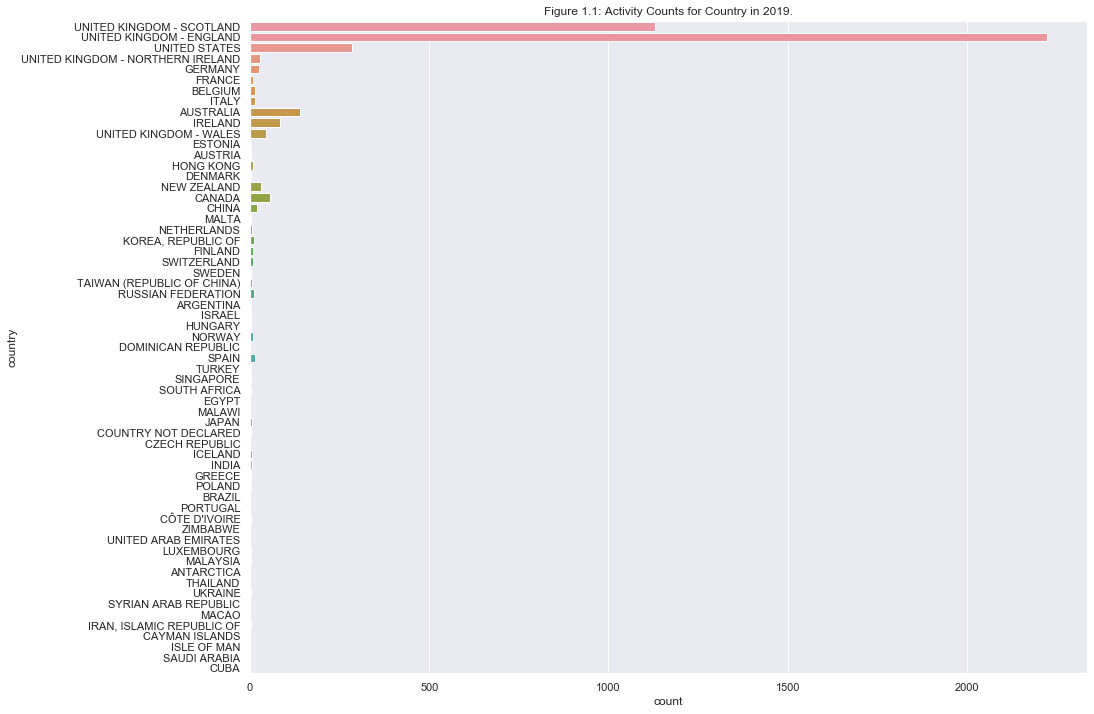

In [36]:
plt.figure(figsize=(15, 12))
sns.set_theme(style="darkgrid")
charts = sns.countplot(y="country", data=fringe_2019)
charts.set_title('Figure 1.1: Activity Counts for Country in 2019.')
plt.show()

- For data in 2018, the chart and cell below show that most of the activity came from England (a total of 2112), followed by Scotland, the US, Australia, Ireland, Canada, and so on.
- For data in 2017, the chart and cell below show that most of the activity came from England (a total of 1985), followed by Scotland, the US, Australia, Ireland, Wales, and so on.
- Most of the activity in 2018 and 2017 was from England and Scotland, it's similar to 2019.
- The cell below shows that the activities in 2018 came from a total of 58 countries or regions.
- The cell below shows that the activities in 2017 came from a total of 61 countries or regions.

In [37]:
print('For 2018:')
print(fringe_2018['country'].describe())
print('\nFor 2017:')
print(fringe_2017['country'].describe())

For 2018:
count                         3985
unique                          58
top       UNITED KINGDOM - ENGLAND
freq                          2112
Name: country, dtype: object

For 2017:
count                         3795
unique                          61
top       UNITED KINGDOM - ENGLAND
freq                          1985
Name: country, dtype: object


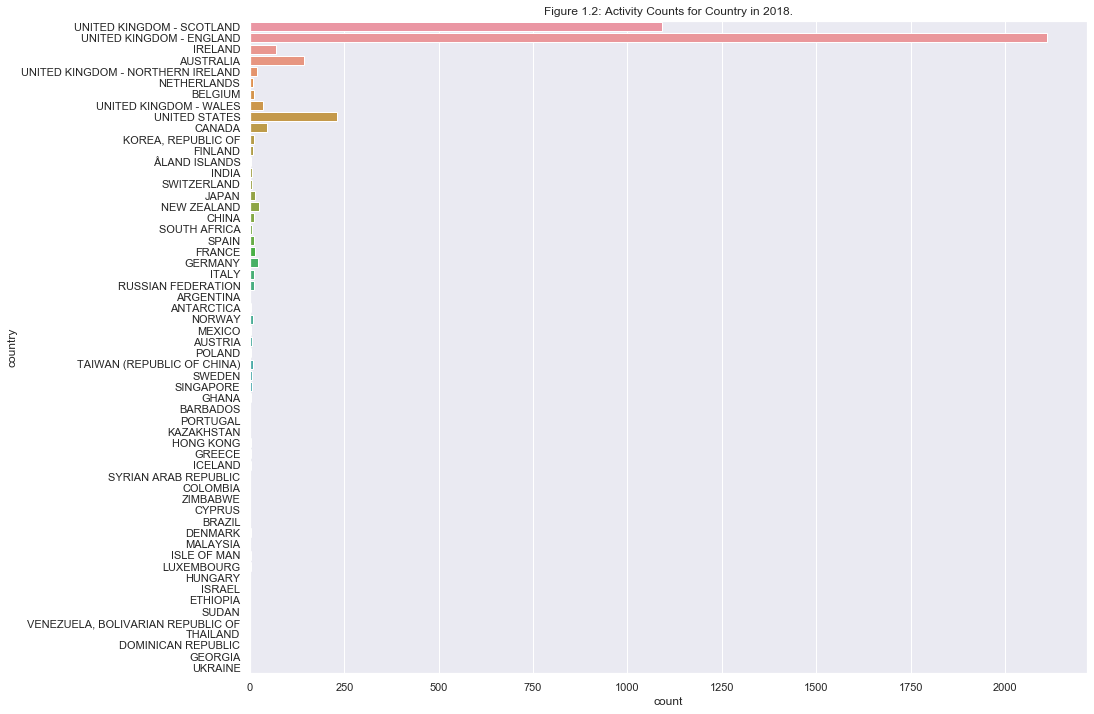

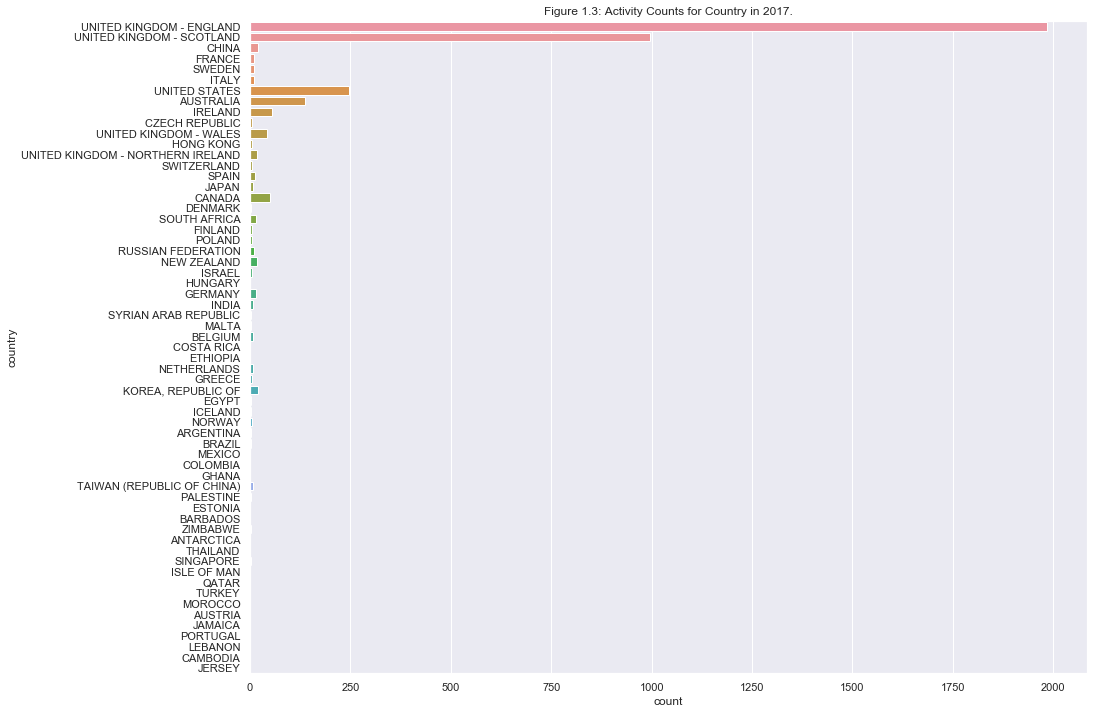

In [38]:
plt.figure(figsize=(15, 12))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="country", data=fringe_2018)
ax.set_title('Figure 1.2: Activity Counts for Country in 2018.')
plt.show()

plt.figure(figsize=(15, 12))
bx = sns.countplot(y="country", data=fringe_2017)
bx.set_title('Figure 1.3: Activity Counts for Country in 2017.')
plt.show()

Integrating the festival data from the internal UK of the past three years, it can be seen below that:
- The number of festivals from England and Scotland increased year by year, and the proportion of festivals from these two regions remained at about 2:1.
- The number of festivals from Wales and Northern Ireland accounts for a very small percentage of the total four regions, and the number of festivals from each has not changed much over the three years.

In [39]:
def from_uk(df):
    return df.loc[(df['country']=='UNITED KINGDOM - ENGLAND') | (df['country']=='UNITED KINGDOM - SCOTLAND')| (df['country']=='UNITED KINGDOM - NORTHERN IRELAND')| (df['country']=='UNITED KINGDOM - WALES')]

UK_2019 = from_uk(fringe_2019)
UK_2018 = from_uk(fringe_2018)
UK_2017 = from_uk(fringe_2017)

UKAll = pd.concat([UK_2017, UK_2018, UK_2019], keys=[2017,2018,2019])

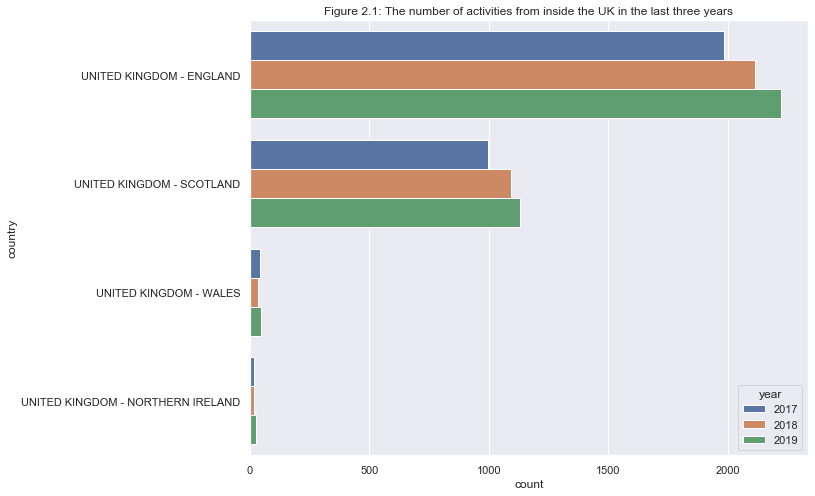

In [40]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=UKAll, y="country", hue='year')
ax.set_title('Figure 2.1: The number of activities from inside the UK in the last three years')
plt.show()

Integrating the festival data from outside the UK of the past three years, it can be seen in the below chart that:
- The United States has the largest number of events, with about 100 more than Australia each year, the second largest. Followed by Australia, Ireland, Canada, New Zealand, Germany, and China.
- The number of activities from several European countries is close, but not large.
- The number of activities from other countries is very small in the past three years.

In [41]:
def from_outside_uk(df):
    return df.loc[(df['country']!='UNITED KINGDOM - ENGLAND') & (df['country']!='UNITED KINGDOM - SCOTLAND')& (df['country']!='UNITED KINGDOM - NORTHERN IRELAND')& (df['country']!='UNITED KINGDOM - WALES')]
outside_UK_2019 = from_outside_uk(fringe_2019)
outside_UK_2018 = from_outside_uk(fringe_2018)
outside_UK_2017 = from_outside_uk(fringe_2017)

outside_UKAll = pd.concat([outside_UK_2017, outside_UK_2018, outside_UK_2019], keys=[2017,2018,2019])

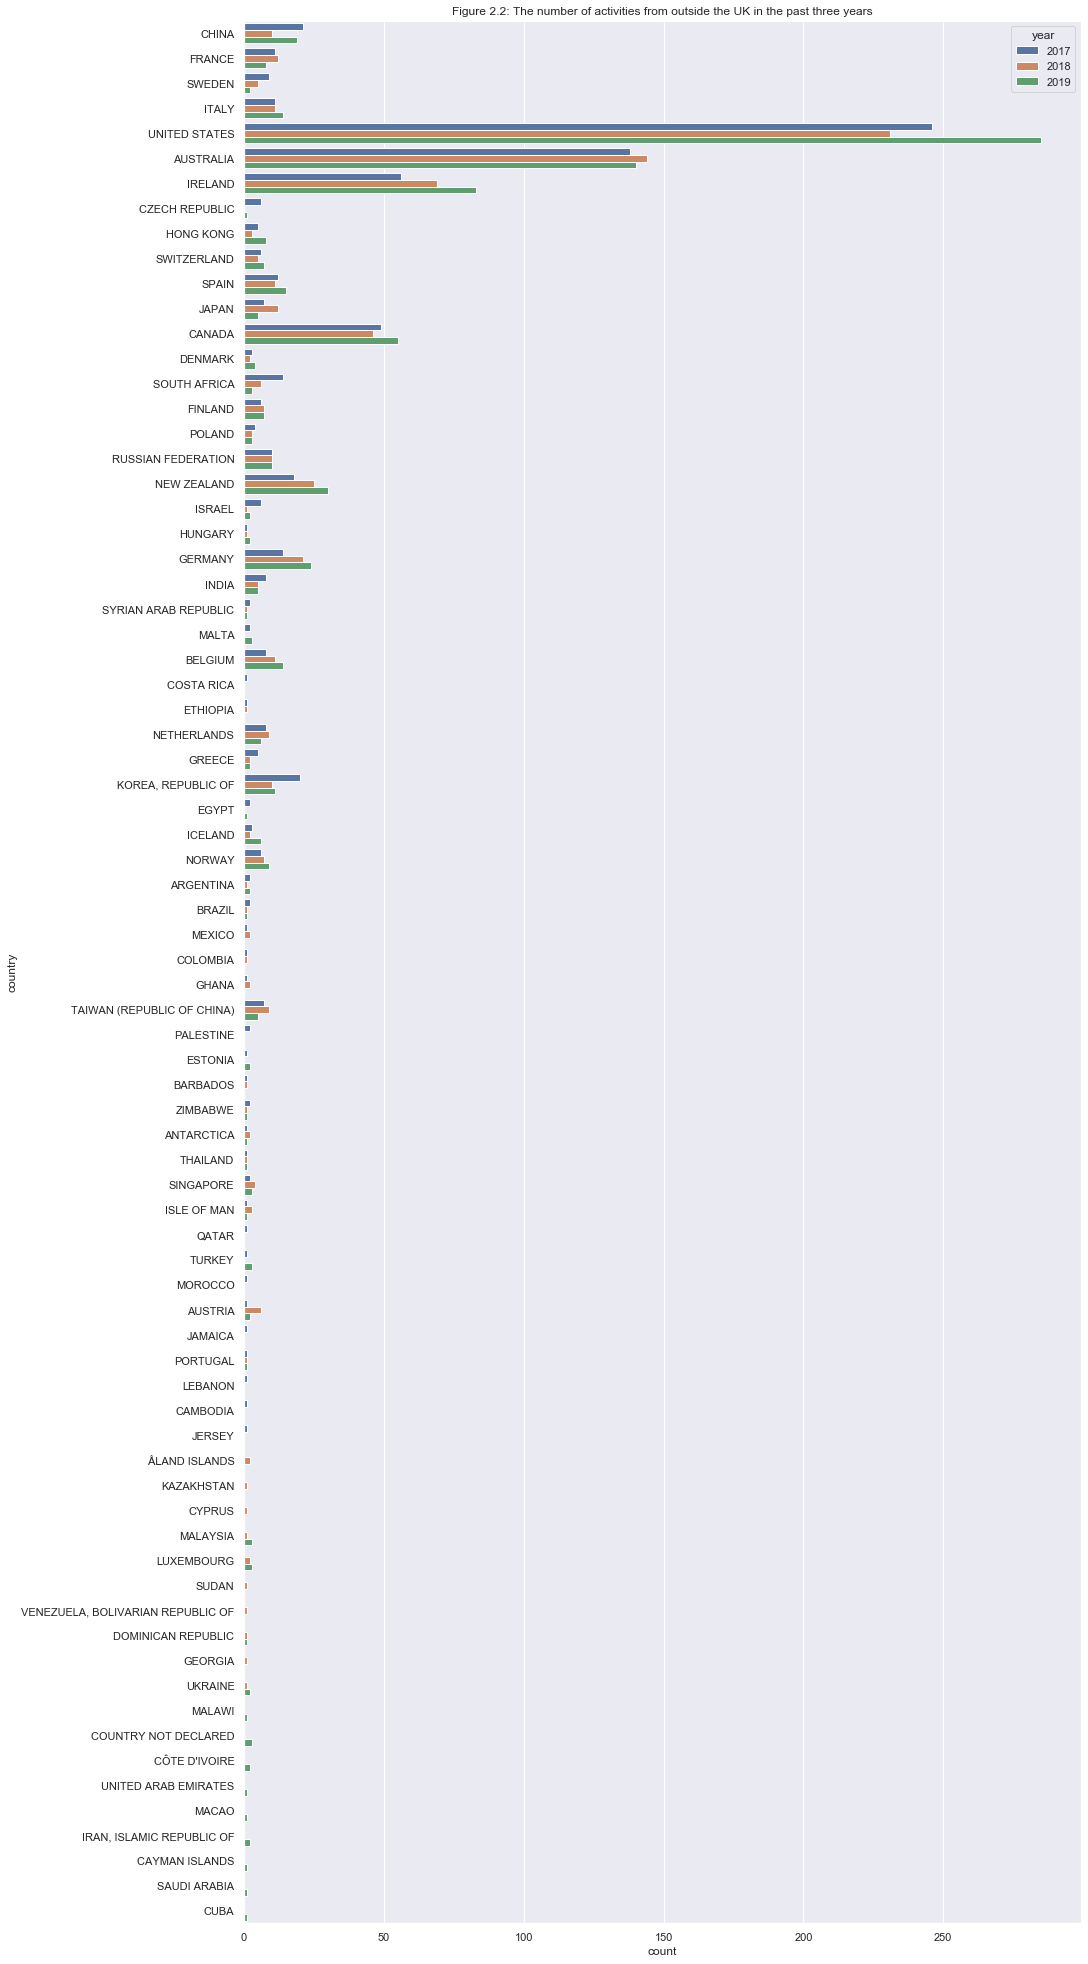

In [42]:
plt.figure(figsize=(15, 35))
ax = sns.countplot(data=outside_UKAll, y="country", hue='year')
ax.set_title('Figure 2.2: The number of activities from outside the UK in the past three years')
plt.show()

### Performances

Second, explore the data in the "performances" column. I think an important piece of information is implicit in this column, which is the number of times each activity is held. I also covered this briefly in the "description" section.

In previous codes and cells, I defined the function *performance_times()* to generate three Series: times_2019, times_2018, and times_2017. In these three Series, each value corresponds to the number of times the same index activity was held in the original datasets. Use the function *value_counts()* can get the statistical Series.

The cells and charts below show that in 2019:
- There are 531 activities that were held only once.
- There are 10-400 activities were held by 0-30 times. And a few activities were held between 50-200 times.
- There is one activity that had been held the most times, 422 times.

In 2018 and 2017 the situation of the number of activities was roughly similar to 2019, with slight differences in the maximum, minimum, and tightness of the distribution.

In [43]:
times_2019.describe()

count    4257.000000
mean       14.634015
std        14.287378
min         0.000000
25%         5.000000
50%        13.000000
75%        24.000000
max       422.000000
dtype: float64

In [44]:
times_2019.value_counts().describe()

count     70.000000
mean      60.814286
std      106.025058
min        1.000000
25%        1.000000
50%        4.500000
75%       85.500000
max      531.000000
dtype: float64

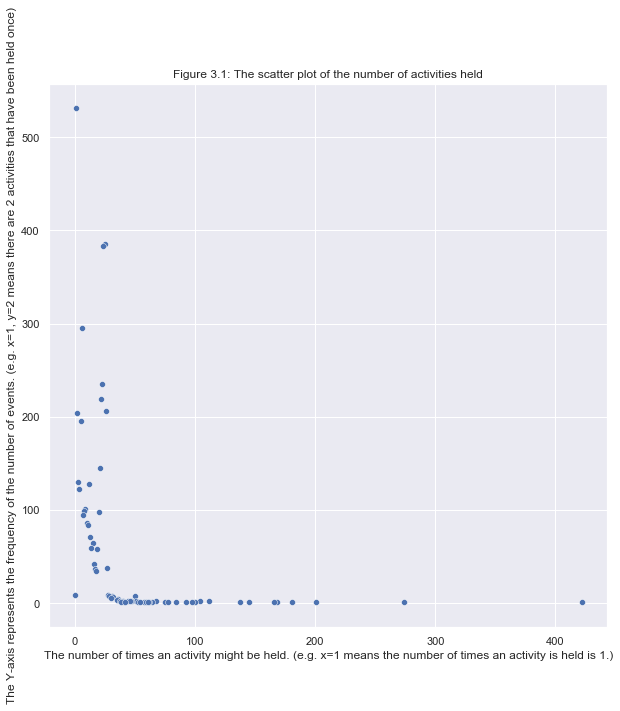

In [45]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=times_2019.value_counts())
ax.set_title('Figure 3.1: The scatter plot of the number of activities held')
plt.xlabel('The number of times an activity might be held. (e.g. x=1 means the number of times an activity is held is 1.)')
plt.ylabel('The Y-axis represents the frequency of the number of events. (e.g. x=1, y=2 means there are 2 activities that have been held once)')
plt.show()

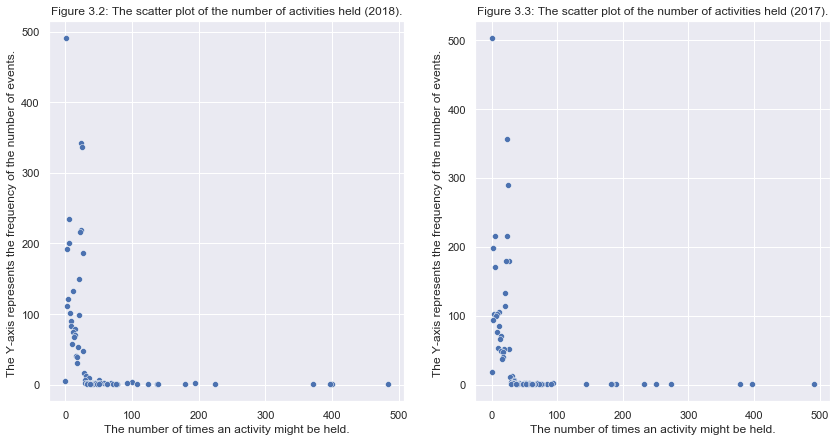

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(14,7))
ax1,ax2 = axes.ravel()

sns.scatterplot(data=times_2018.value_counts(), ax=ax1)
ax1.set_title('Figure 3.2: The scatter plot of the number of activities held (2018).')
ax1.set_xlabel('The number of times an activity might be held.')
ax1.set_ylabel('The Y-axis represents the frequency of the number of events. ')

sns.scatterplot(data=times_2017.value_counts(), ax=ax2)
ax2.set_title('Figure 3.3: The scatter plot of the number of activities held (2017).')
ax2.set_xlabel('The number of times an activity might be held.')
ax2.set_ylabel('The Y-axis represents the frequency of the number of events. ')

plt.show()

### Combined "country" and "performances"

The figure below shows the performance times of activities **in four regions of the UK**, with each point representing activity and the Y-axis representing how many times an activity has been held.

As can be seen from this chart:
- Most of the activities in the four regions were held 0-30 times, and the distribution among them is bimodal. England, Wales, and Northern Ireland, in particular, show a similar pattern of wide at the top and narrow at the bottom. The distribution in Scotland is also bimodal, but the distribution is narrow on top and wide on the bottom.
- Unlike the other two regions, some events from England and Scotland were held more than 30 times, with a distribution ranging from 30 to 300 times. The most frequent activities can reach more than 400 times.

In [47]:
def addPerformTimes(df):
    temp_df = df.copy()
    temp_times = performance_times(temp_df)
    temp_df['perform_times'] = list(temp_times)
    return temp_df

UKAll = addPerformTimes(UKAll)

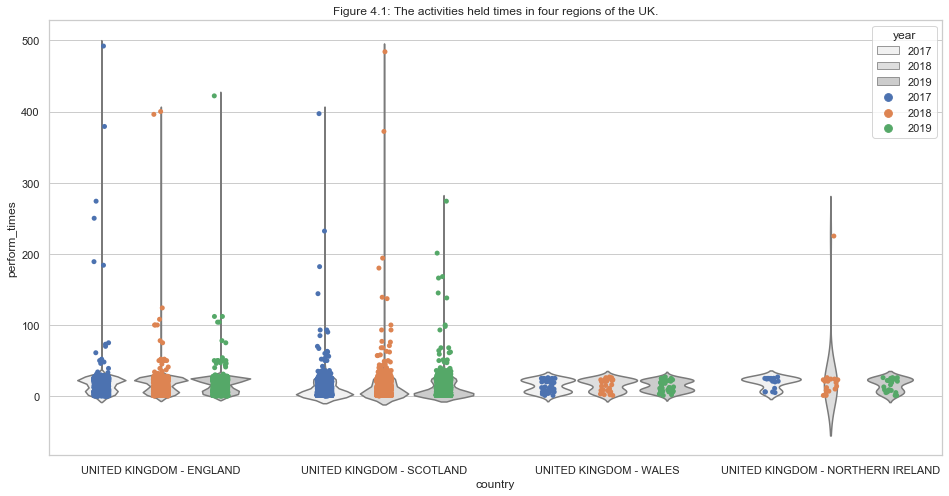

In [48]:
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="country", y="perform_times", hue='year', data=UKAll, inner=None, color=".8")
ax = sns.stripplot(x="country", y="perform_times", hue='year', data=UKAll, dodge=True)
ax.set_title('Figure 4.1: The activities held times in four regions of the UK.')
plt.show()

The figure below shows the performance times of activities **outside of the UK**, with each point representing activity and the Y-axis representing how many times an activity has been held.

As can be seen from this chart:
- Most of the activities outside the UK were held 0-30 times, and the distribution among them is bimodal and shows a pattern of wide at the top and narrow at the bottom. 
- There are some events that were held more than 30 times, with a distribution ranging from 30 to 55 times. The most frequent activities can reach more than 150 times.
- The distribution below is similar to Wales and Northern Ireland.

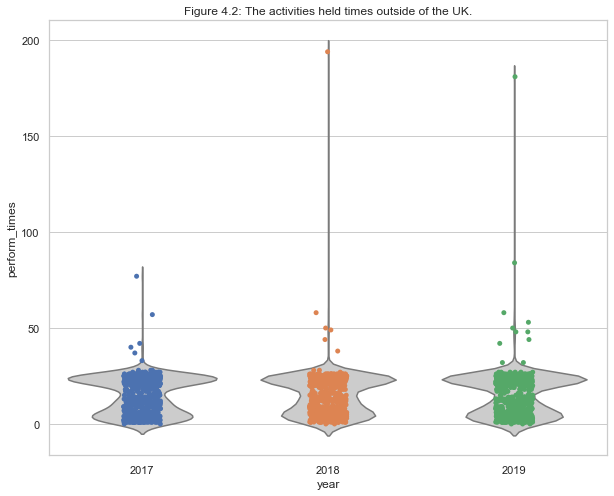

In [49]:
outside_UKAll = addPerformTimes(outside_UKAll)
plt.figure(figsize=(10, 8))
ax = sns.violinplot(x="year", y="perform_times", data=outside_UKAll, inner=None, color=".8")
ax = sns.stripplot(x="year", y="perform_times", data=outside_UKAll, dodge=True)
ax.set_title('Figure 4.2: The activities held times outside of the UK.')
plt.show()

## Reflect and Hypothesise

In my previous analysis and visualisations, I have focused on the "country" and the "performances" columns in the data. I have analyzed each of these columns and combined these two columns with years for my analysis. On the one hand, I paid attention to the basic situation of these two columns, including the distribution, occurrence frequency, and so on. On the other hand, combined with the communication with the data host, I also paid attention to whether these two columns could reflect the popularity or success of an activity.

Hypothesises and Reflections：
- Activities from the UK may be more popular.<br> 
  From Figures 1.1, 1.2, 1.3, and 2.1, it can be seen that in the past three years, activities from England and Scotland accounted for the majority of the total, and there were also a certain number of activities from other parts of the UK. And activities from the UK has increased year by year.<br>
  To test this hypothesis, the next step is to consider whether there are differences in other variables in the datasets between activities from the UK and those from other countries. For example, we can compare the number of performers  of an activity ("performers_number" column) and the country from which the activity comes, etc.<br>
  This hypothesis may also be related to the geographical reasons, the degree of cultural development of a country or region, etc.
  
- The popularity of the activity may depend on whether the event is from an English-speaking country.<br>
  It can be seen from Figures 1.1, 1.2, 1.3, and 2.2 that in the past three years, in addition to the activities from the four regions in the UK, a considerable part of the activities came from English-speaking countries (such as the United States, Australia, Ireland, Canada, and so on).<br>
  To test this hypothesis, the next step is combining activities from English-speaking countries and other countries with other variables in the database to see how the combined data behaves. For example, we can compare the "non_english" and "country" columns to see if the language is relevant to the country and if the language can affect the popularity of an activity.<br>
  This hypothesis may also be related to the economic capacity of a country or region, the geographical reasons, and the level of cultural development of a country or region, etc.
  
- The popularity of an event may be related to the number of times the event is held.<br>
  As can be seen from Figures 3.1, 3.2, and 3.3, quite a few activities were held more than once in the fringe festival, and most of the performance times were concentrated between 0 and 30 times. There are also a few activities held many times, up to about 400 times.<br>
  In order to verify the validity of this hypothesis, next we can combine the number of events with other variables in the datasets. For example, we can observe whether the performance times of activity are related to the price of the activity (column "performances"\['price'\]), the age limit of the activity ("age_category" column), the genre type of the activity ("genre_type"), the artist type of the activity ("artist_type"), etc.<br>
  This hypothesis may also be related to factors such as whether the activity is interesting.